# Capstone 3: Forecasting Solar Power Using LTSM  
### _"Exploring ML Techniques for Solar Predictions"_
## Exploratory Data Analysis Objectives: 
### 1. Understand Data Distribution  
- Examine statistical summaries of key features.  
- Identify skewness and distribution patterns in numerical data.  
- Visualize density plots and histograms for variables.  

### 2. Identify Relationships and Trends  
- Correlation Analysis to identify relationships between features
- Time-Series Analysis to analyze trends in solar power generation and weather conditions over time.


### 3. Outlier Detection & Anomaly Investigation  
- Identify Outliers by using box plots to detect anomalies in power generation or weather conditions. Highlighting potential outliers that could skew the forecasting model's accuracy.
- Investigate Anomalies for detected outliers, by investigating patterns in weather data that may explain unusual behavior


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Solar/Data')

df = pd.read_csv('solar_cleaned.csv')

## 1. Understand Data Distribution 

In [215]:
df.head()

,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Inverter_Efficiency,Cumulative_Yield,Normalized_Yield,Plant_Efficiency,DATE,TIME,HOUR
0,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0.0,6259559.0,0.0,0.052321,2020-05-15,00:00:00,0
1,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0.0,12443204.0,0.0,0.052321,2020-05-15,00:00:00,0
2,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0.0,19430963.0,0.0,0.052321,2020-05-15,00:00:00,0
3,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0.0,27033923.0,0.0,0.052321,2020-05-15,00:00:00,0
4,2020-05-15 00:00:00,1,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0.0,34192887.0,0.0,0.052321,2020-05-15,00:00:00,0


In [217]:
df.info

<bound method DataFrame.info of                   DATE_TIME  PLANT_ID  AMBIENT_TEMPERATURE  \
0       2020-05-15 00:00:00         1            25.184316   
1       2020-05-15 00:00:00         1            25.184316   
2       2020-05-15 00:00:00         1            25.184316   
3       2020-05-15 00:00:00         1            25.184316   
4       2020-05-15 00:00:00         1            25.184316   
...                     ...       ...                  ...   
136467  2020-06-17 23:45:00         2            23.202871   
136468  2020-06-17 23:45:00         2            23.202871   
136469  2020-06-17 23:45:00         2            23.202871   
136470  2020-06-17 23:45:00         2            23.202871   
136471  2020-06-17 23:45:00         2            23.202871   

        MODULE_TEMPERATURE  IRRADIATION       SOURCE_KEY  DC_POWER  AC_POWER  \
0                22.857507          0.0  1BY6WEcLGh8j5v7       0.0       0.0   
1                22.857507          0.0  1IF53ai7Xc0U56Y       

In [380]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE_TIME,136472,2020-06-01 09:22:57.605662464,2020-05-15 00:00:00,2020-05-23 23:00:00,2020-06-01 18:45:00,2020-06-09 21:45:00,2020-06-17 23:45:00,NaN
PLANT_ID,136472.0,1.496058,1.0,1.0,1.0,2.0,2.0,0.499986
AMBIENT_TEMPERATURE,136472.0,26.763066,20.398505,23.637604,25.908122,29.266583,39.181638,3.89734
MODULE_TEMPERATURE,136472.0,31.920744,18.140415,22.411698,26.413755,40.778583,66.635953,11.803674
IRRADIATION,136472.0,0.230767,0.0,0.0,0.026213,0.442961,1.221652,0.305652
DC_POWER,136472.0,1708.373962,0.0,0.0,5.993333,1155.595,14471.125,3222.079306
AC_POWER,136472.0,274.790259,0.0,0.0,3.493095,532.568571,1410.95,380.180214
DAILY_YIELD,136472.0,3295.366192,0.0,28.285714,2834.642857,5992.0,9873.0,3035.313217
TOTAL_YIELD,136472.0,330391576.972408,0.0,6520020.0,7269333.0,282609586.0,2247916295.0,608576923.107735
Inverter_Efficiency,136472.0,0.255666,0.0,0.0,0.096489,0.098219,1.00832,0.401497


In [219]:
df.dtypes

DATE_TIME               object
PLANT_ID                 int64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
Inverter_Efficiency    float64
Cumulative_Yield       float64
Normalized_Yield       float64
Plant_Efficiency       float64
DATE                    object
TIME                    object
HOUR                     int64
dtype: object

### 1.1 Visualize density plots and histograms for variables. 

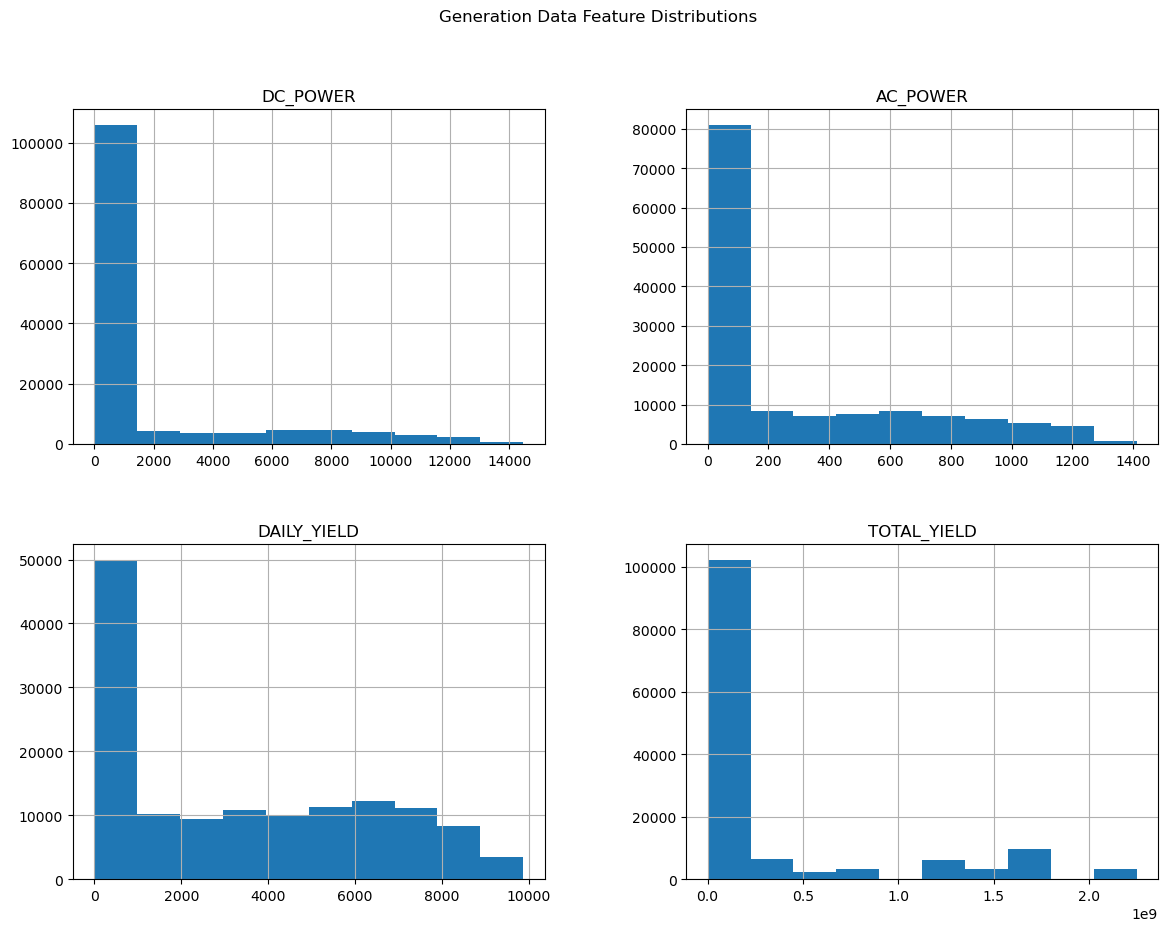

In [346]:
df[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(14, 10))
plt.suptitle("Generation Data Feature Distributions")
plt.show()

Insights on distribution:
- DC_POWER & AC_POWER, both features exhibit a steep decline in frequency as power increases (suggesting skewed distribution). 
- DAILY_YIELD, gradual decline with peaks in higher ranges indicates possible outliers. Transformations like scaling or normalization can help manage such discrepancies.
- TOTAL_YIELD, clusters around specific values, suggesting grouped or cumulative data that may need preprocessing. 

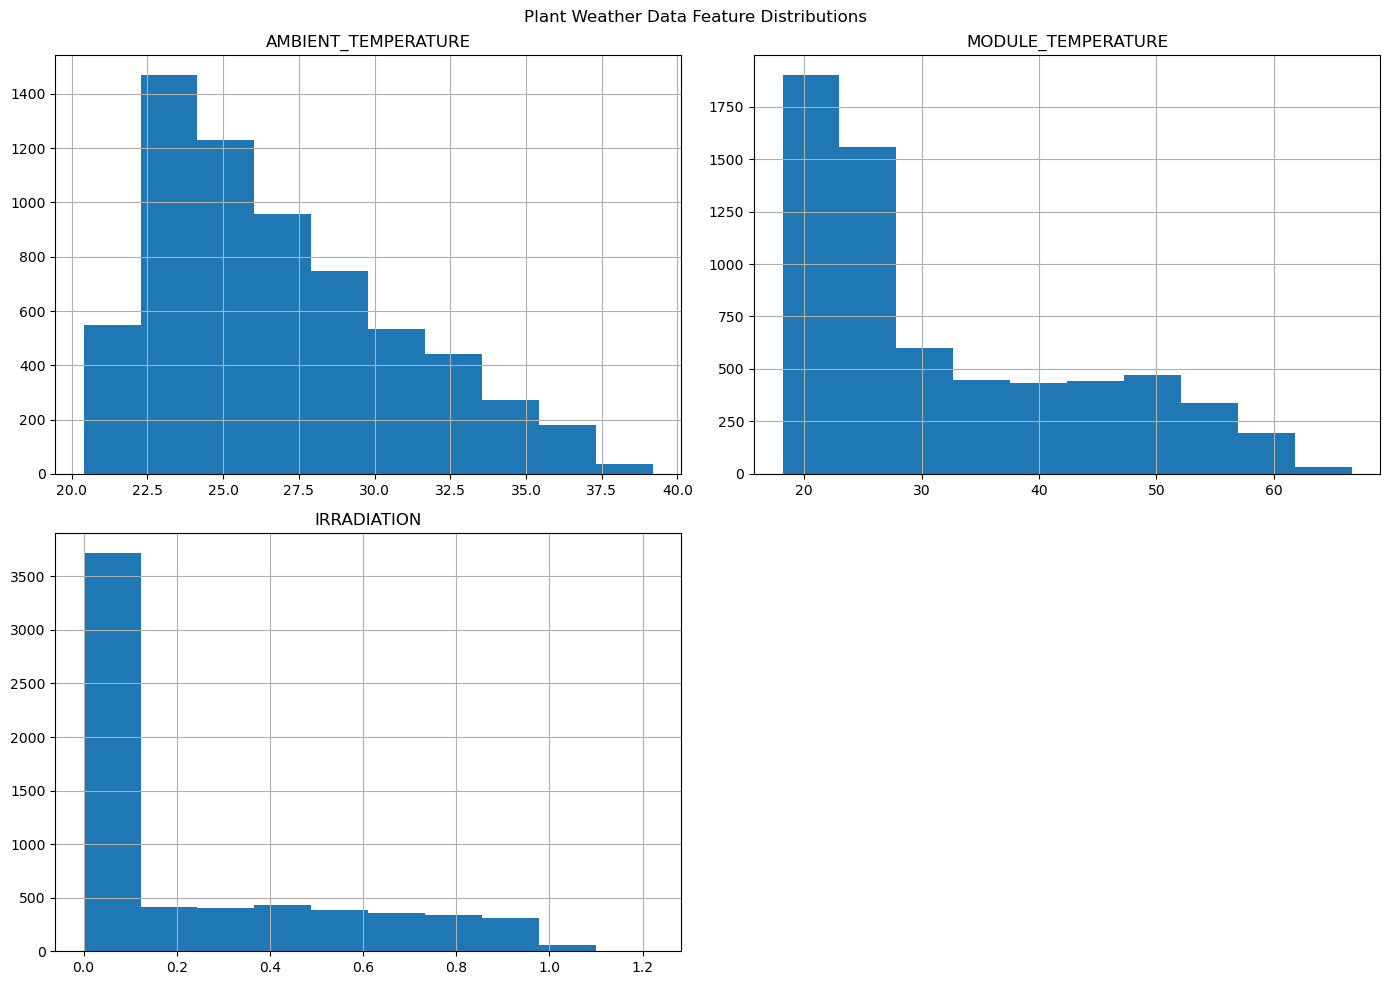

In [186]:
# Weather Data
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(14, 10))
plt.suptitle("Plant Weather Data Feature Distributions")
plt.tight_layout()
plt.show()

Insight on distribution: 
- Normalized distribution is seen for Ambient Temperature, a slightly for  Module Temperature. 
- There is a noticable right-skew to Irradition variable, potential to apply a log transformation to help skewness. 

## 2. Identify Relationships and Trends  

### 2.1 Feature-Specific Univariate Analysis

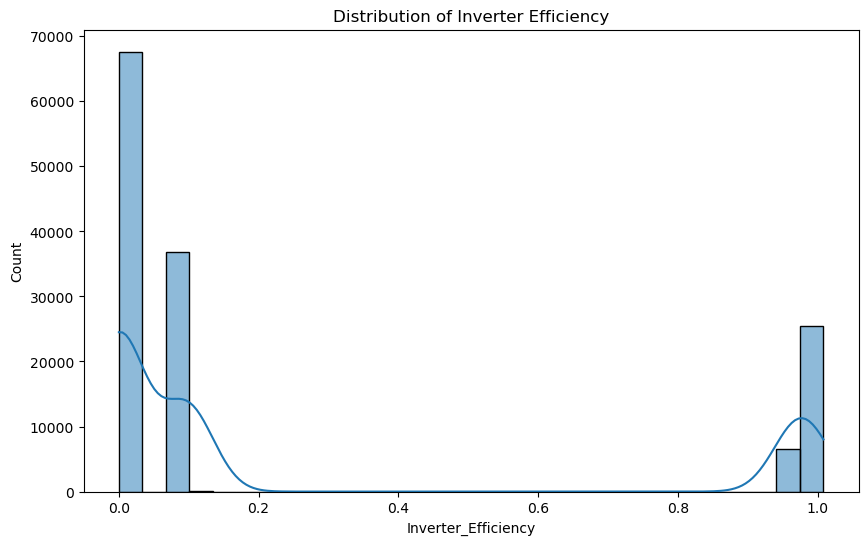

In [402]:
#Inverter Efficiency
plt.figure(figsize=(10, 6))
sns.histplot(df['Inverter_Efficiency'], kde=True, bins=30)
plt.title('Distribution of Inverter Efficiency')
plt.show()

Inverter Efficiency clusters at **0.0** and **1.0**. Could consider converting into a binary variable of High or Low.

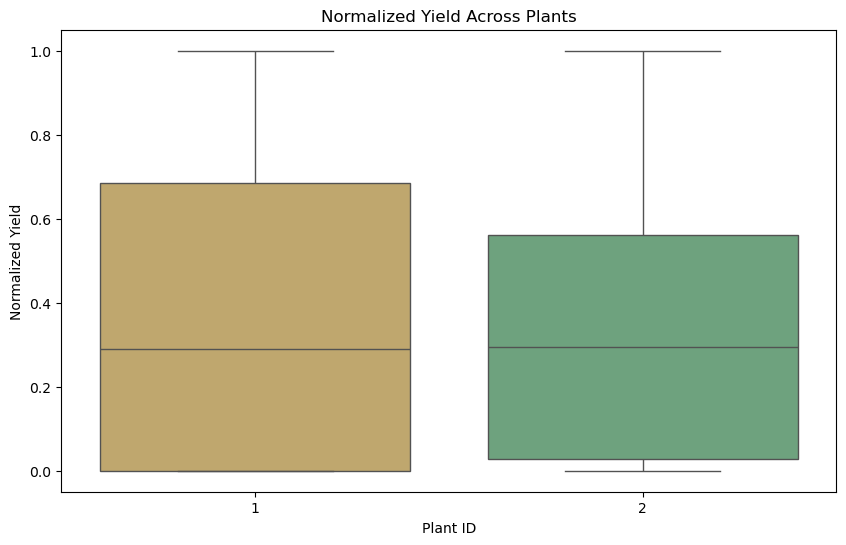

In [400]:
#Normalized Yield: 
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLANT_ID', y='Normalized_Yield', data=df, hue='PLANT_ID', legend=False, palette=['#ccad60', '#65ab7a'])
plt.title('Normalized Yield Across Plants')
plt.xlabel('Plant ID')
plt.ylabel('Normalized Yield')
plt.show()

The variability (interquartile range) in Plant 1’s yield is larger, suggesting potential instability or wider operational conditions. Plant 1 has more visible outliers above the upper whisker. These may signal periods of exceptionally high performance or data inconsistencies.

### 2.2 Bivariate Analysis 

#### Correlation Analysis

In [223]:
# Convert DATE_TIME column
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

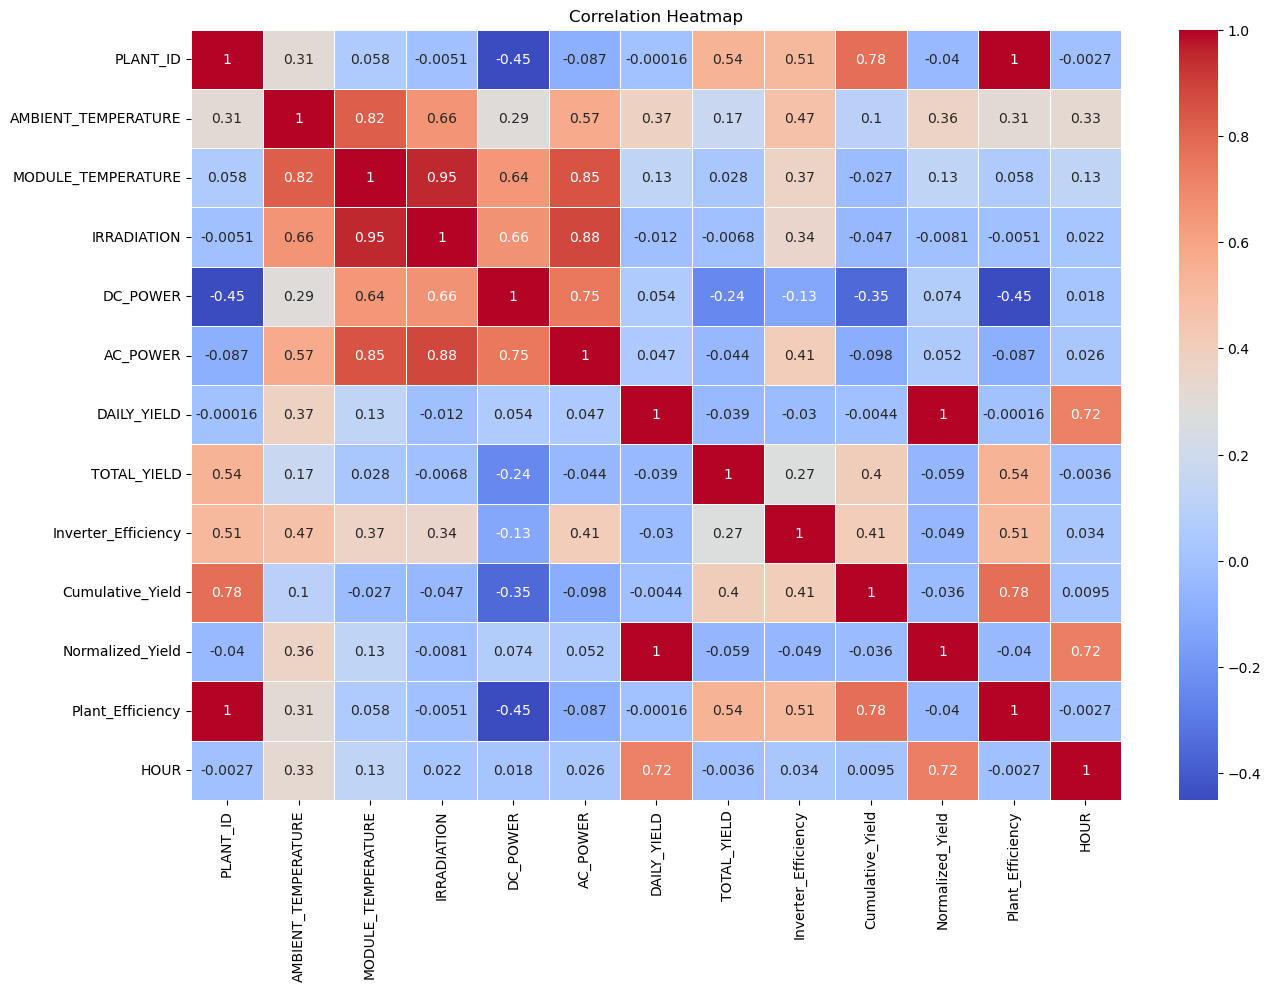

In [227]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr_df = df[numeric_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Heatmap Insights

The correlation heatmap visualizes relationships between variables in your solar plant dataset using colors—blue (negative correlation) to red (positive correlation). Here's what it reveals:

1. **Strong Positive Correlations:**
   - `MODULE_TEMPERATURE` and `DC_POWER` have a strong positive relationship, as higher module temperature often leads to increased energy generation.
   - `IRRADIATION` and `DC_POWER` also display a strong positive correlation, emphasizing the role of irradiation in power generation.
   - `DC_POWER` and `AC_POWER` have an almost perfect correlation, reflecting their direct connection in the power conversion process.

2. **Negative Correlations:**
   - Features like `HOUR` might show slight negative correlations with power metrics (`DC_POWER`, `AC_POWER`), indicating energy generation decreases during non-solar hours.

3. **Low Correlations:**
   - Variables such as `PLANT_ID` and `SOURCE_KEY` exhibit negligible correlations with continuous features, acting more as identifiers than influencing factors.

4. **Efficiency Metrics:**
   - Correlations involving `Inverter_Efficiency` and `Plant_Efficiency` may provide valuable insights into operational optimizations or inefficiencies.

#### Potential Next Steps
- Redundant features of `PLANT_ID` or `SOURCE_KEY` can be removed in preprocessing. 


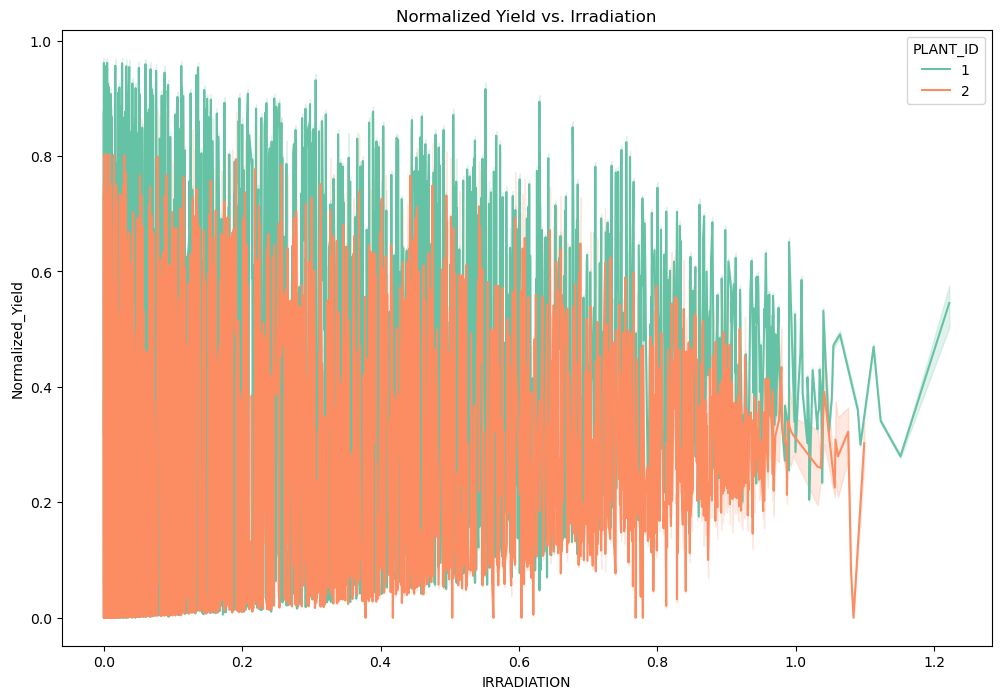

In [412]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='IRRADIATION', y='Normalized_Yield', hue='PLANT_ID', data=df, estimator='mean', palette='Set2')
plt.title('Normalized Yield vs. Irradiation')
plt.show()

Insights include: 
- Wide range of normalized yield,
- High variability at low irradtiaon,
- Diverging trends at high irradiation
- Relationship between `Normalized_Yield` and `Irradiation` is non-linear. 

#### Plant-Level Comparisons

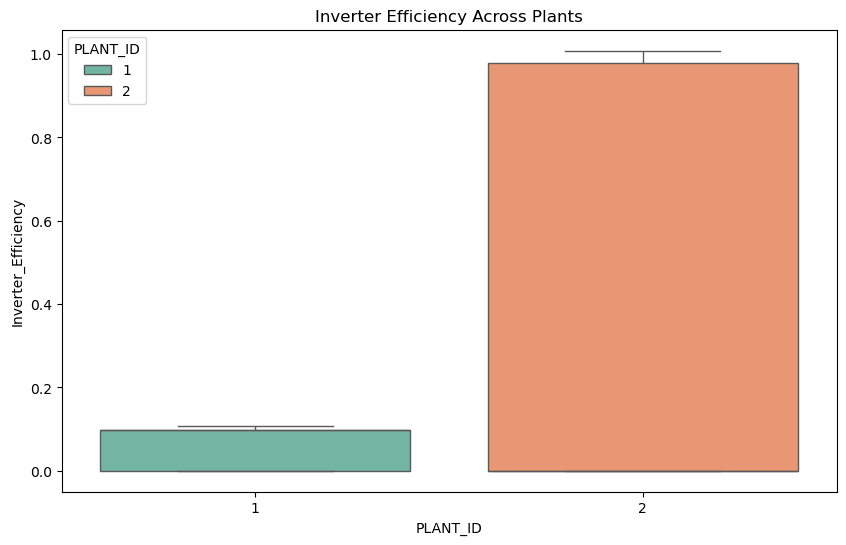

In [416]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PLANT_ID', y='Inverter_Efficiency', data=df, hue='PLANT_ID', palette='Set2')
plt.title('Inverter Efficiency Across Plants')
plt.show()

Plant 2 shows significantly higher inverter efficiency than plant 1. Plant 1 exhibits lower efficiency overall suggesting possible operational challenges or system inefficiencies. 

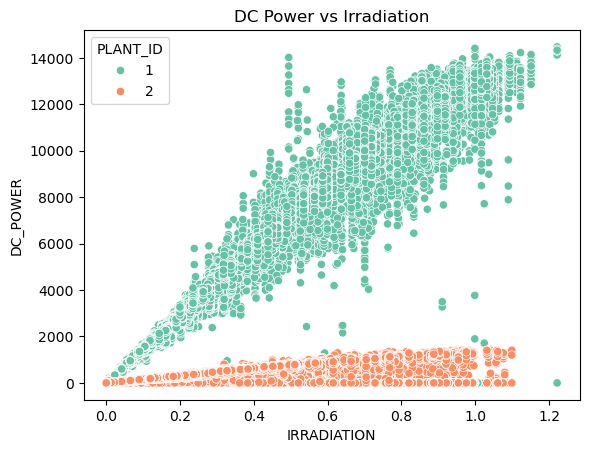

In [419]:
sns.scatterplot(x='IRRADIATION', y='DC_POWER', hue='PLANT_ID', data=df, palette='Set2')
plt.title('DC Power vs Irradiation')
plt.show()


Insight: 
Data clustering - plants show tighter distribution in mid-irradiation levels, indicative of stable performance under optimal conditions. Plant 1 is producing more power while Plant 2 plateaus sooner, hinting at system differences such as inverter limitations or module performance. 

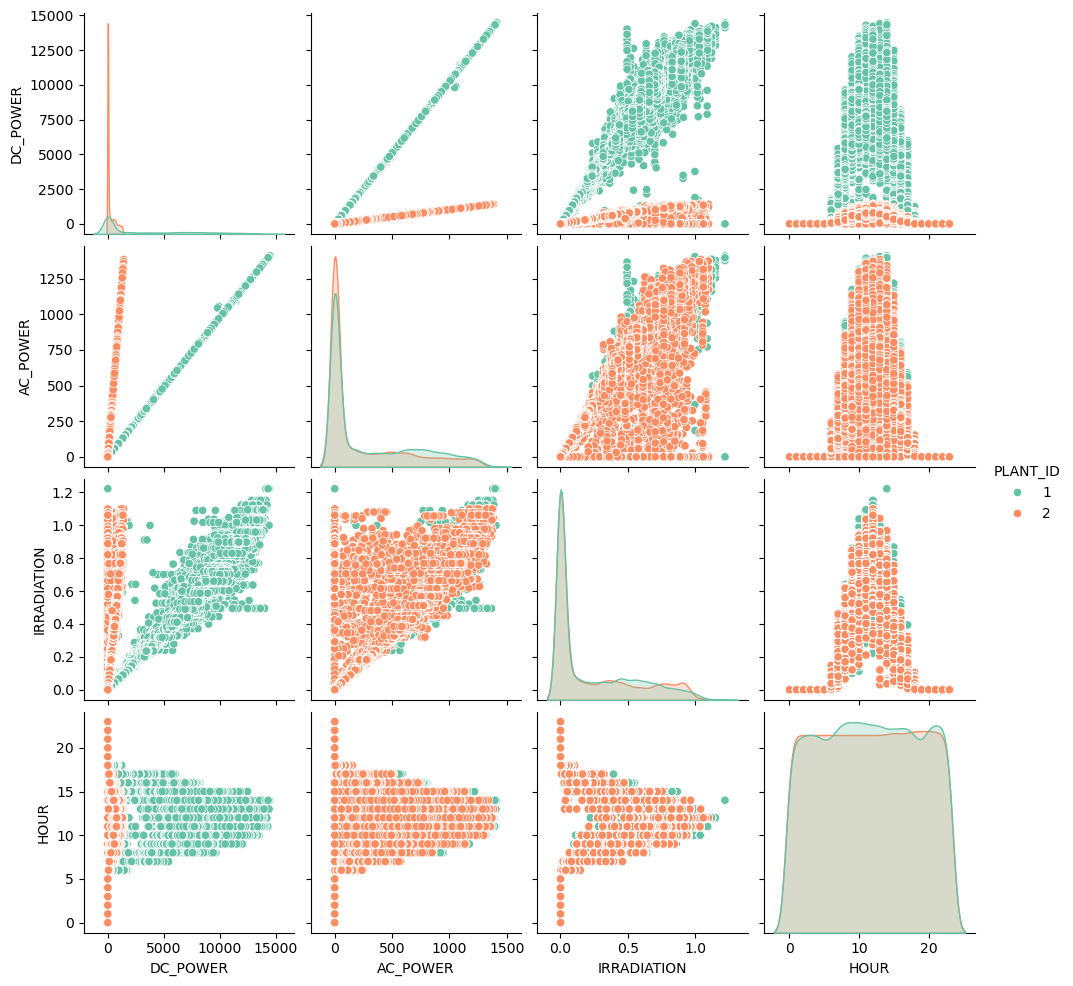

In [430]:
#custom_palette = sns.color_palette(["#CBD8A6", "#A38AB6"]) 
sns.pairplot(df, vars=['DC_POWER', 'AC_POWER','IRRADIATION', 'HOUR'], hue='PLANT_ID', palette='Set2')
plt.show()

Scatter plot Variable Relationships:
- `DC_POWER`vs `IRRADIATION`: Clear positive correlation for both plants
- `IRRADIATION` vs `HOUR`: Both plants exhibit higher irradiation during midday hours with lower values during early mornings or evenings
- `DC_POWER` vs `AC_POWER`: Strong linear relationship. Plant 1 produces more power but its lower inverter efficiency might explain deviations in AC output. 


### 2.3 Time Series Analysis 

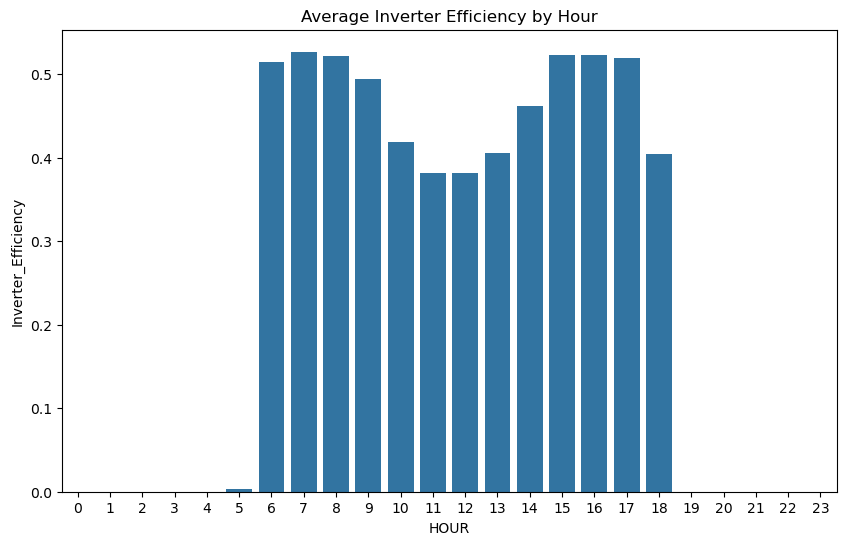

In [323]:
hourly_efficiency = df.groupby('HOUR')['Inverter_Efficiency'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='HOUR', y='Inverter_Efficiency', data=hourly_efficiency)
plt.title('Average Inverter Efficiency by Hour')
plt.show()

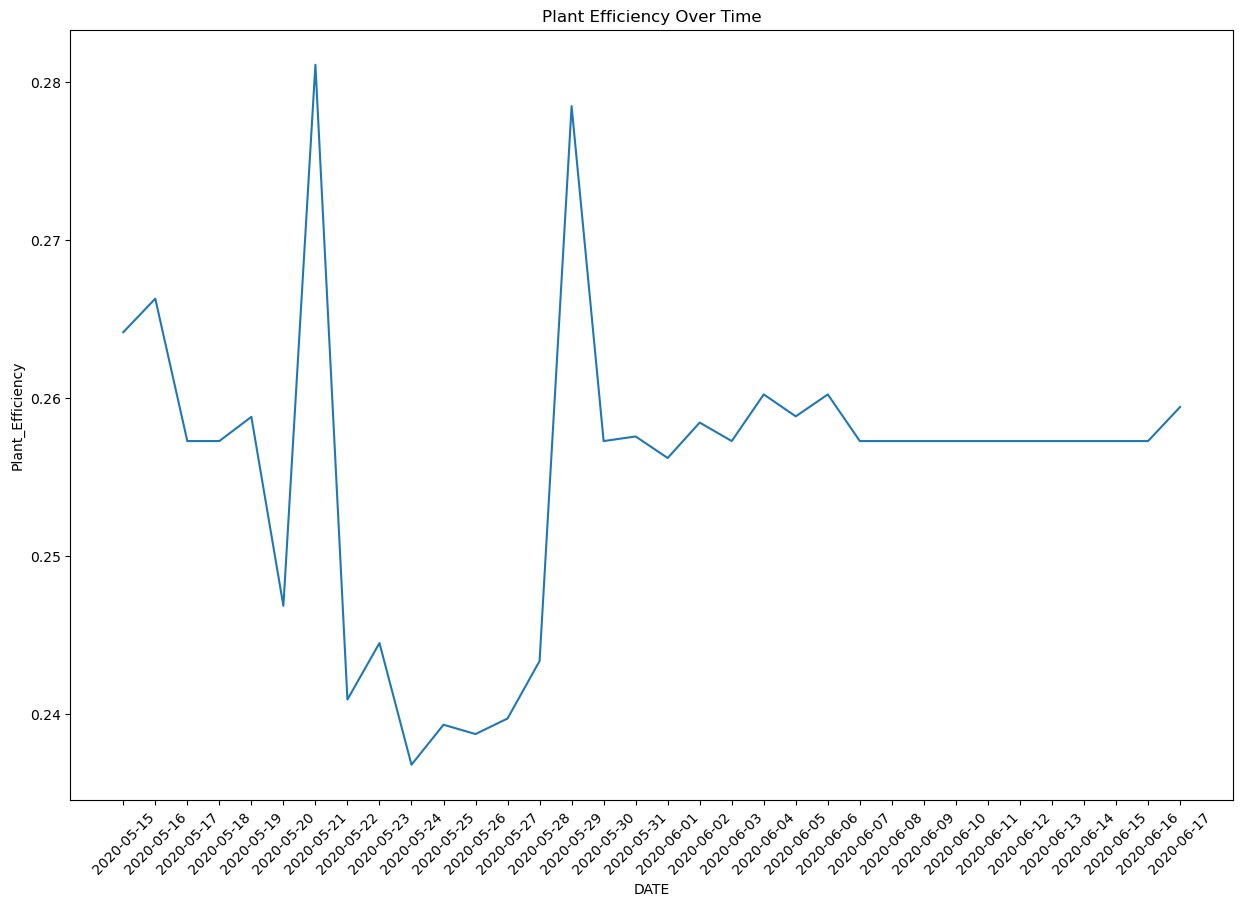

In [327]:
daily_efficiency = df.groupby('DATE')['Plant_Efficiency'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(x='DATE', y='Plant_Efficiency', data=daily_efficiency)
plt.xticks(rotation=45) 
plt.title('Plant Efficiency Over Time')
plt.show()

There might be seasonal trends to observe since plant efficiency has low and highs. Weather and seasonal variations in sunlight availability.

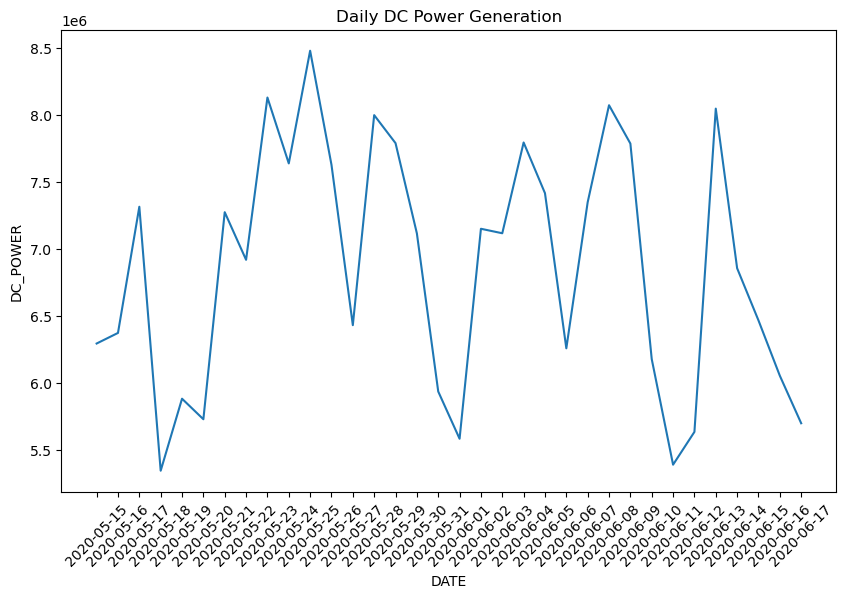

In [289]:
daily_power = df.groupby('DATE')['DC_POWER'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y='DC_POWER', data=daily_power)
plt.xticks(rotation=45) 
plt.title('Daily DC Power Generation')
plt.show()

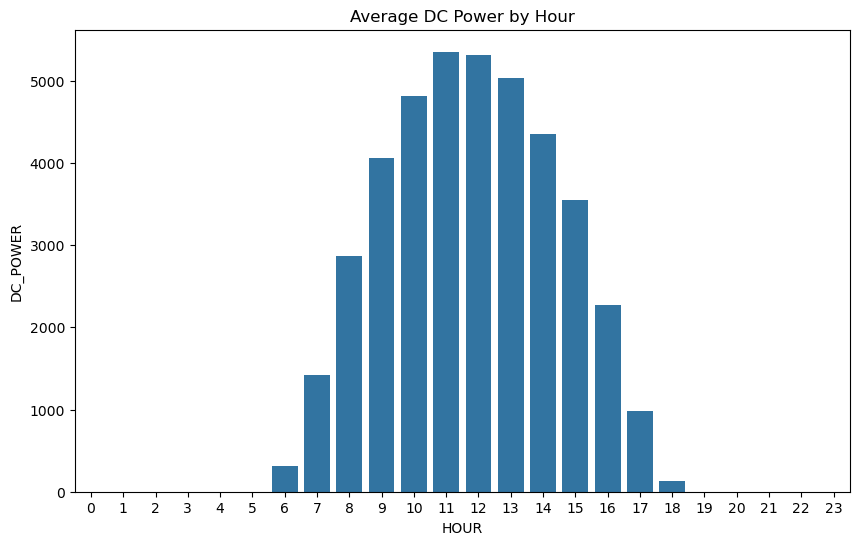

In [307]:
hourly_power = df.groupby('HOUR')['DC_POWER'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='HOUR', y='DC_POWER', data=hourly_power)
plt.title('Average DC Power by Hour')
plt.show()

## 3. Outlier Detection & Anomaly Investigation 

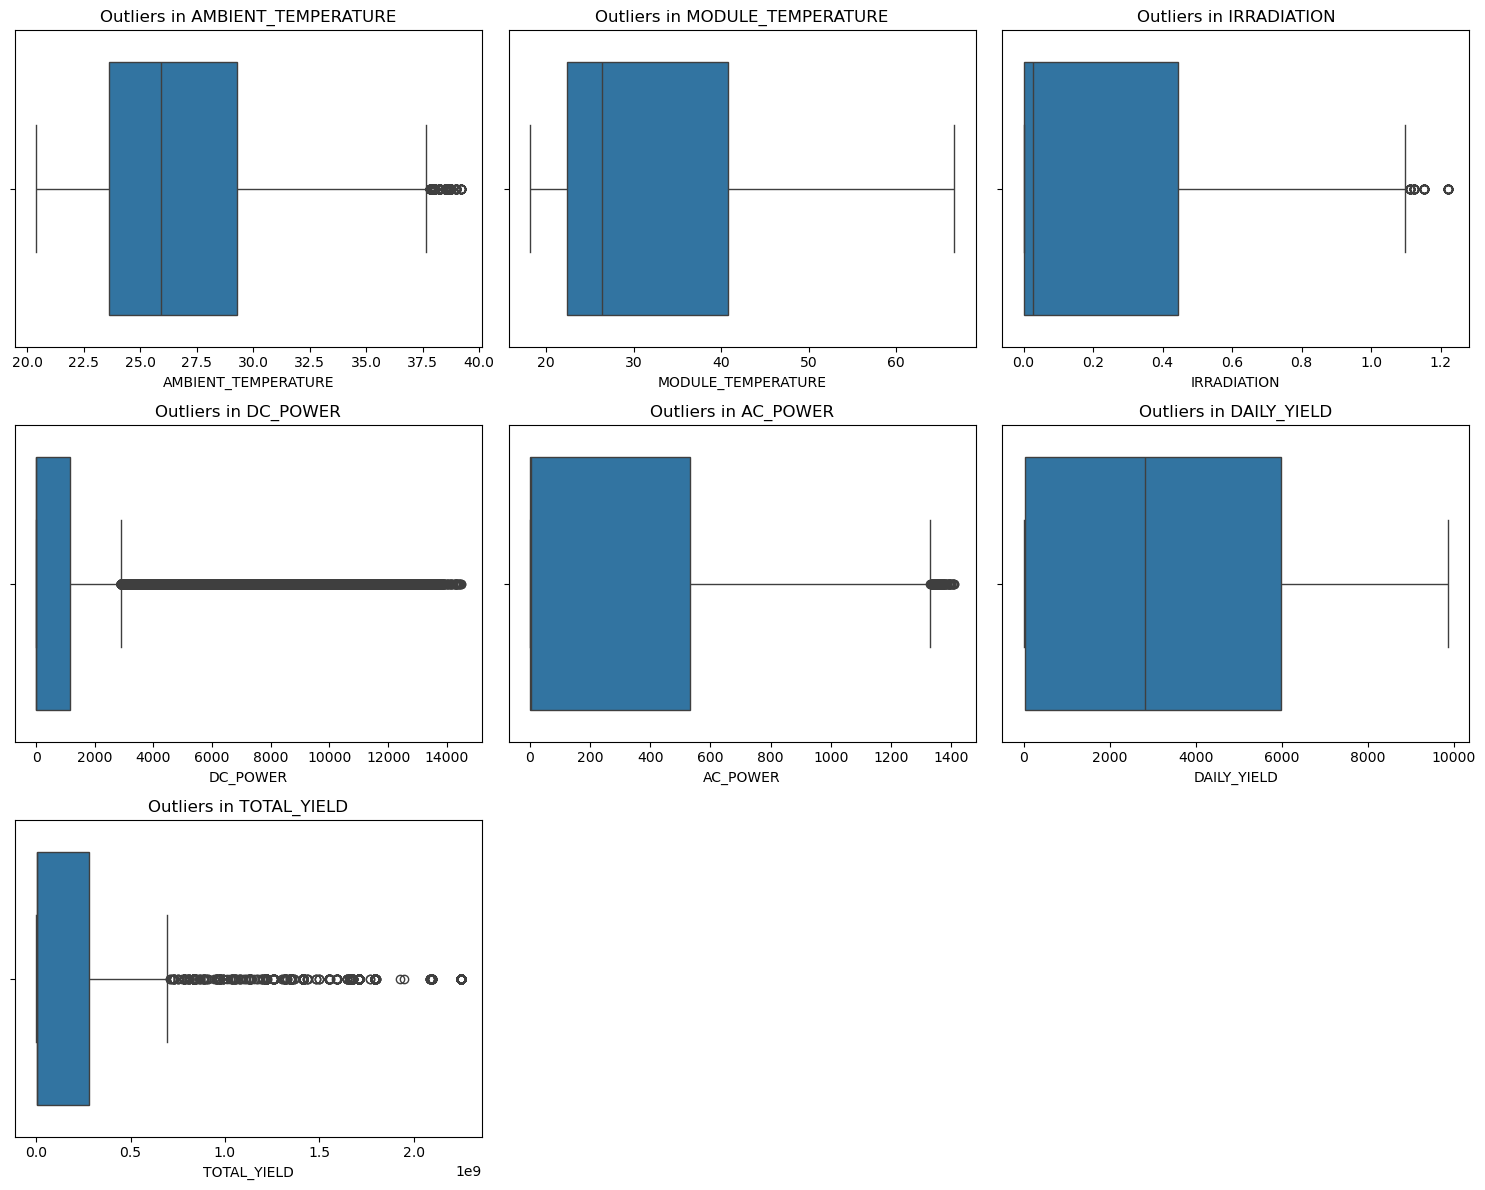

In [436]:
numerical_cols = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Outliers in {col}')

for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout() 
plt.show()



#### 1. Key Observations:
- **`AMBIENT_TEMPERATURE`:**
  - The range is concentrated between approximately 20°C and 40°C, with a few outliers above 35°C. These could reflect unusually hot days or data anomalies worth investigating.
- **`MODULE_TEMPERATURE`:**
  - Exhibits a broader range (20°C to 60°C). The lack of significant outliers suggests module temperatures are stable, even under varying conditions.
- **`IRRADIATION`:**
  - Presence of outliers above 0.8 indicates unusually high sunlight exposure that might affect power generation or system efficiency.
- **`DC_POWER` and `AC_POWER`:**
  - Both show significant ranges with numerous outliers at the upper end. For `DC_POWER`, outliers above 4000 could signal periods of peak production, whereas inverters might struggle to keep up given the outliers for `AC_POWER` above 1000.
- **`DAILY_YIELD`:**
  - No significant outliers, indicating consistent energy yield over time.
- **`TOTAL_YIELD`:**
  - Shows a wide range, with many outliers above 1 billion. This may point to accumulated production discrepancies or exceptionally high outputs.

---

#### 2. Insights:
- **Outliers Could Signal Anomalies or Events:**
  - Outliers in `IRRADIATION`, `DC_POWER`, and `TOTAL_YIELD` might align with extreme weather conditions or operational peaks.
- **Operational Efficiencies:**
  - The gap between `DC_POWER` and `AC_POWER` may reflect inverter efficiency challenges. It's worth exploring these high-output periods for system optimization.
- **Performance Trends:**
  - The stable distributions of `AMBIENT_TEMPERATURE` and `MODULE_TEMPERATURE` suggest controlled operational conditions overall.

---

 #### 3. Actions for Refinement:
 - **Outlier Handling:**
   - Investigate outliers in `IRRADIATION`, `DC_POWER`, and `TOTAL_YIELD` to determine if they reflect legitimate conditions or data errors.
